In [ ]:

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import time
import csv

Demo_data = tf.keras.datasets.mnist

# Classifying the data
(X_train,y_train),(X_test,y_test) = Demo_data.load_data()

#Normalizing the data
X_train, X_test = X_train/255, X_test/255

# model defining
model = tf.keras.models.Sequential()

# adding layers to the model
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()


11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


0.1
Epoch 1/5
458/469 [============================>.] - ETA: 0s - loss: 0.9838 - accuracy: 0.7442
Epoch 1: val_accuracy improved from -inf to 0.84940, saving model to 0.1best_model.h5
469/469 [==============================] - 3s 4ms/step - loss: 0.9793 - accuracy: 0.7446 - val_loss: 0.6365 - val_accuracy: 0.8494
Epoch 2/5
467/469 [============================>.] - ETA: 0s - loss: 0.9039 - accuracy: 0.7368
Epoch 2: val_accuracy did not improve from 0.84940
469/469 [==============================] - 2s 4ms/step - loss: 0.9032 - accuracy: 0.7369 - val_loss: 0.6455 - val_accuracy: 0.8481
Epoch 3/5
465/469 [============================>.] - ETA: 0s - loss: 0.8920 - accuracy: 0.7346
Epoch 3: val_accuracy did not improve from 0.84940
469/469 [==============================] - 2s 5ms/step - loss: 0.8912 - accuracy: 0.7348 - val_loss: 0.6701 - val_accuracy: 0.8161
Epoch 4/5
464/469 [============================>.] - ETA: 0s - loss: 0.9025 - accuracy: 0.7287
Epoch 4: val_accuracy did not impro

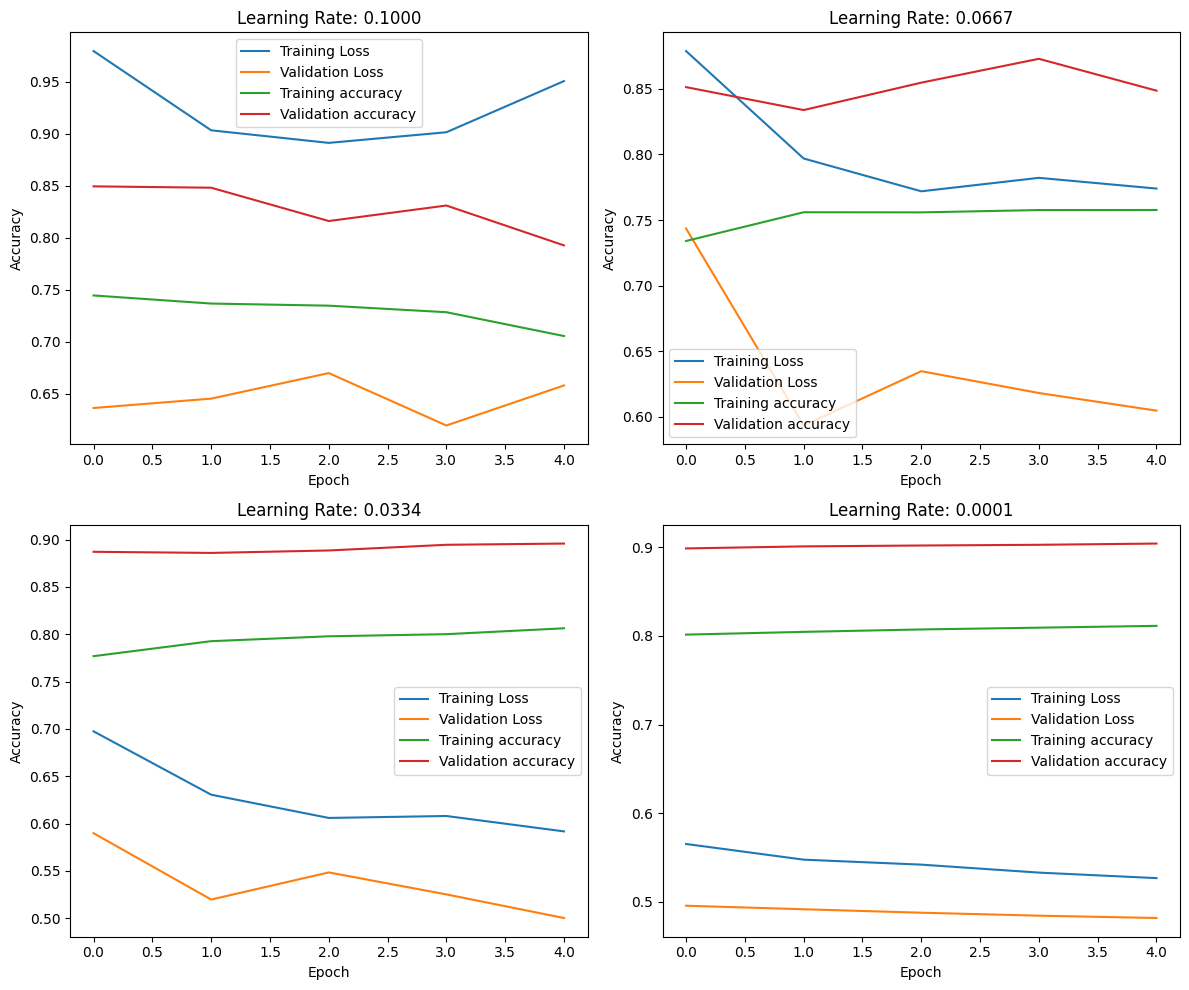

In [ ]:
# Subplotting

train_loss=[]
train_accuracy=[]
val_loss=[]
val_accuracy=[]
time_taken=[]
Learning_Rate = []
Batch_Size=[]
List_Lr=np.linspace(0.1,0.0001,4)

_,axs = plt.subplots(2,2,figsize=(12,10))
for i,l_rate in enumerate(List_Lr):
  print(l_rate)
  initial_time=time.time()
  Optimizer=tf.keras.optimizers.Adam(learning_rate=l_rate)

  checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=str(l_rate)+'best_model.h5',
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      mode='max',
                                      verbose=1)

  model.compile(optimizer=Optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  batch_size_1 = 128
  history=model.fit(X_train,y_train,epochs=5,batch_size = batch_size_1,
                    validation_data=(X_test,y_test),
                    callbacks=[checkpoint_callback])
  print("Time taken for LR:{}".format(l_rate),time.time()-initial_time)

  train_loss.append(history.history['loss'])
  train_accuracy.append(history.history['accuracy'])
  val_loss.append(history.history['val_loss'])
  val_accuracy.append(history.history['val_accuracy'])
  Learning_Rate.append(l_rate)
  time_taken.append(time.time()-initial_time)
  Batch_Size.append(batch_size_1)

  axs[i//2, i%2].plot(history.history['loss'], label='Training Loss')
  axs[i//2, i%2].plot(history.history['val_loss'], label='Validation Loss')
  axs[i//2, i%2].set_title(f'Learning Rate: {l_rate:.4f}')
  axs[i//2, i%2].set_xlabel('Epoch')
  axs[i//2, i%2].set_ylabel('Loss')
  axs[i//2, i%2].legend()

  axs[i//2, i%2].plot(history.history['accuracy'], label='Training accuracy')
  axs[i//2, i%2].plot(history.history['val_accuracy'], label='Validation accuracy')
  axs[i//2, i%2].set_title(f'Learning Rate: {l_rate:.4f}')
  axs[i//2, i%2].set_xlabel('Epoch')
  axs[i//2, i%2].set_ylabel('Accuracy')
  axs[i//2, i%2].legend()



plt.tight_layout()
plt.savefig("mnist_model.png")

plt.show()


filename = 'Checkpoints.csv'
with open(filename, 'w' , newline = '') as file:
  writer = csv.writer(file)
  writer.writerow(['Learning Rate', ' Epoch','Batch_Size', 'Training loss' , 'Validation loss' , 'Training accuracy' , 'Validation accuracy' , 'Time taken'])
  for i in range(len(Learning_Rate)):
    lr = Learning_Rate[i]
    for epoch in range(len(train_accuracy[i])):
      writer.writerow([lr, epoch + 1 ,Batch_Size[i], train_loss[i][epoch] , val_loss[i][epoch] , train_accuracy[i][epoch] , val_accuracy[i][epoch] , time_taken[i]])



Learning_rate = 0.1 , Batch_size = 64
Epoch 1/20
925/938 [============================>.] - ETA: 0s - loss: 1.2620 - accuracy: 0.6186
Epoch 1: val_accuracy improved from -inf to 0.64670, saving model to 64_epoch_0.1_LR_best_model.h5
938/938 [==============================] - 5s 5ms/step - loss: 1.2628 - accuracy: 0.6174 - val_loss: 1.0345 - val_accuracy: 0.6467
Epoch 2/20
936/938 [============================>.] - ETA: 0s - loss: 1.2771 - accuracy: 0.5880
Epoch 2: val_accuracy improved from 0.64670 to 0.68020, saving model to 64_epoch_0.1_LR_best_model.h5
938/938 [==============================] - 6s 6ms/step - loss: 1.2770 - accuracy: 0.5879 - val_loss: 1.0032 - val_accuracy: 0.6802
Epoch 3/20
937/938 [============================>.] - ETA: 0s - loss: 1.3984 - accuracy: 0.5332
Epoch 3: val_accuracy did not improve from 0.68020
938/938 [==============================] - 4s 4ms/step - loss: 1.3984 - accuracy: 0.5331 - val_loss: 1.2605 - val_accuracy: 0.5404
Epoch 4/20
926/938 [=========

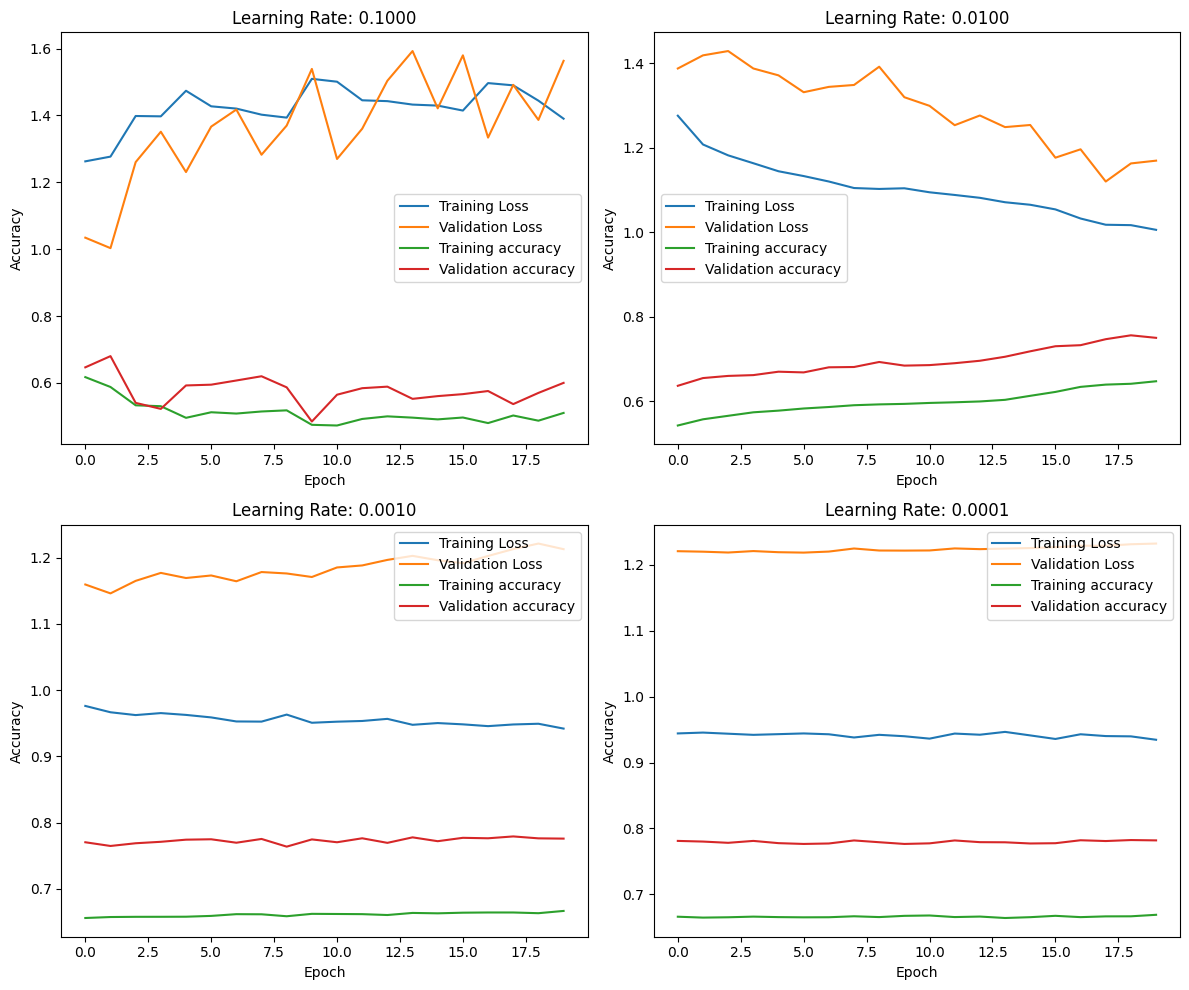

Learning_rate = 0.1 , Batch_size = 128
Epoch 1/20
466/469 [============================>.] - ETA: 0s - loss: 1.2207 - accuracy: 0.5842
Epoch 1: val_accuracy improved from -inf to 0.64250, saving model to 128_epoch_0.1_LR_best_model.h5
469/469 [==============================] - 5s 9ms/step - loss: 1.2207 - accuracy: 0.5840 - val_loss: 1.4280 - val_accuracy: 0.6425
Epoch 2/20
462/469 [============================>.] - ETA: 0s - loss: 1.2373 - accuracy: 0.5619
Epoch 2: val_accuracy did not improve from 0.64250
469/469 [==============================] - 3s 6ms/step - loss: 1.2372 - accuracy: 0.5613 - val_loss: 1.2278 - val_accuracy: 0.6249
Epoch 3/20
468/469 [============================>.] - ETA: 0s - loss: 1.2707 - accuracy: 0.5490
Epoch 3: val_accuracy did not improve from 0.64250
469/469 [==============================] - 3s 6ms/step - loss: 1.2707 - accuracy: 0.5490 - val_loss: 1.5047 - val_accuracy: 0.5855
Epoch 4/20
462/469 [============================>.] - ETA: 0s - loss: 1.3293 -

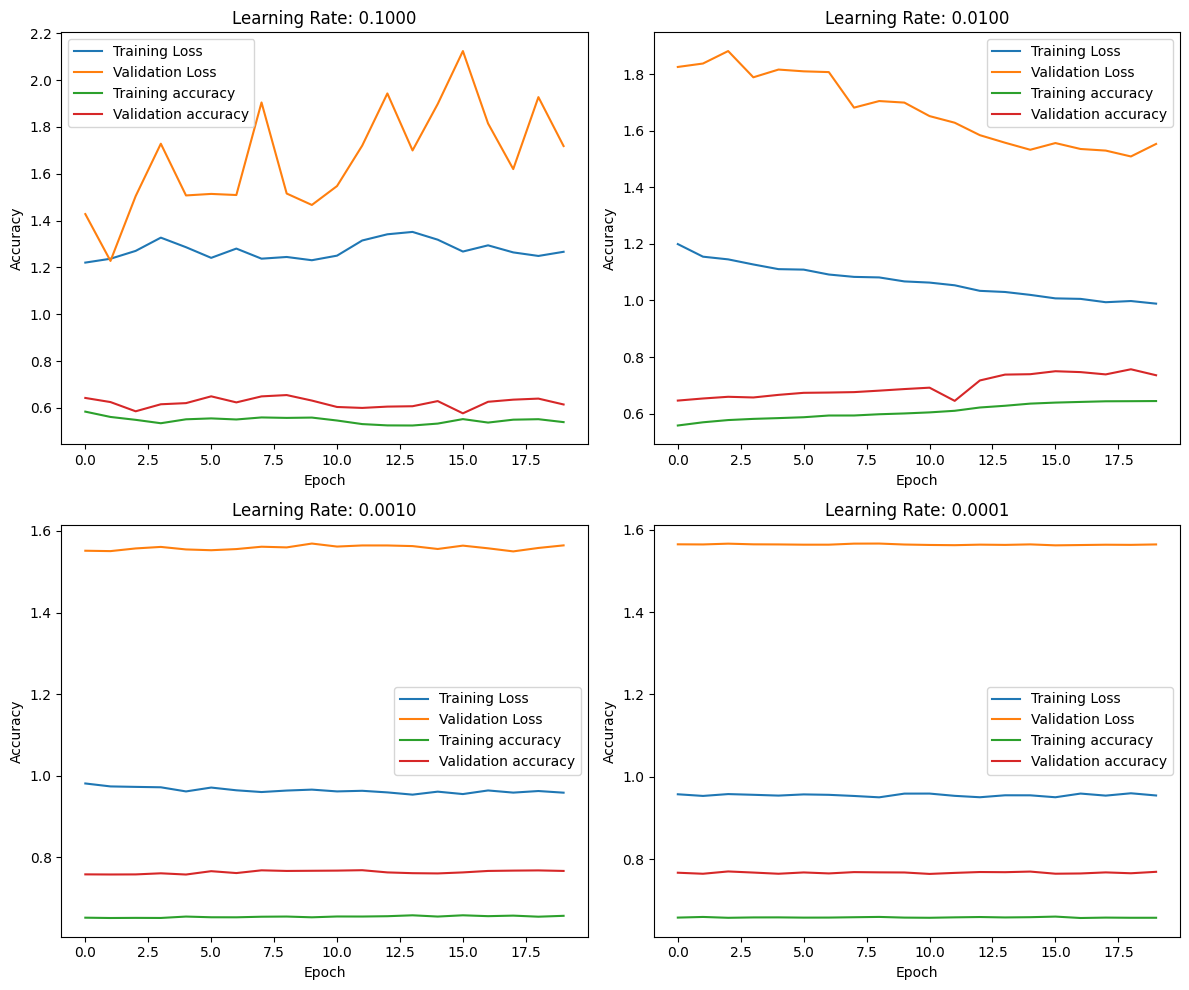

Learning_rate = 0.1 , Batch_size = 256
Epoch 1/20
234/235 [============================>.] - ETA: 0s - loss: 1.1855 - accuracy: 0.5925
Epoch 1: val_accuracy improved from -inf to 0.66600, saving model to 256_epoch_0.1_LR_best_model.h5
235/235 [==============================] - 3s 10ms/step - loss: 1.1854 - accuracy: 0.5924 - val_loss: 1.5239 - val_accuracy: 0.6660
Epoch 2/20
232/235 [============================>.] - ETA: 0s - loss: 1.1573 - accuracy: 0.5836
Epoch 2: val_accuracy did not improve from 0.66600
235/235 [==============================] - 2s 8ms/step - loss: 1.1572 - accuracy: 0.5837 - val_loss: 1.9559 - val_accuracy: 0.6581
Epoch 3/20
233/235 [============================>.] - ETA: 0s - loss: 1.1758 - accuracy: 0.5752
Epoch 3: val_accuracy did not improve from 0.66600
235/235 [==============================] - 2s 8ms/step - loss: 1.1761 - accuracy: 0.5754 - val_loss: 1.8388 - val_accuracy: 0.6612
Epoch 4/20
235/235 [==============================] - ETA: 0s - loss: 1.2339 

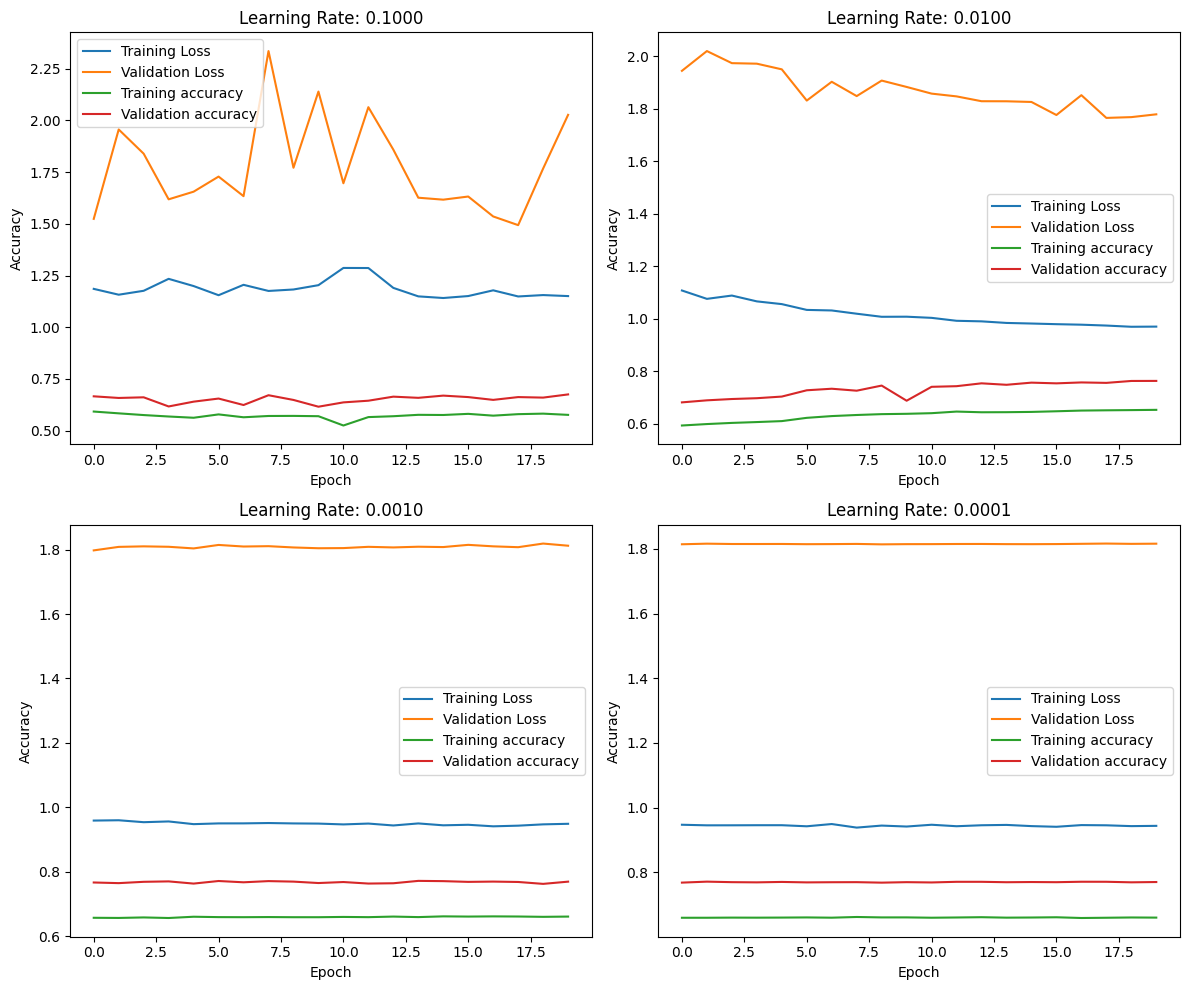

Learning_rate = 0.1 , Batch_size = 512
Epoch 1/20
117/118 [============================>.] - ETA: 0s - loss: 1.0979 - accuracy: 0.6284
Epoch 1: val_accuracy improved from -inf to 0.72160, saving model to 512_epoch_0.1_LR_best_model.h5
118/118 [==============================] - 4s 20ms/step - loss: 1.0973 - accuracy: 0.6287 - val_loss: 1.8735 - val_accuracy: 0.7216
Epoch 2/20
117/118 [============================>.] - ETA: 0s - loss: 1.1082 - accuracy: 0.6049
Epoch 2: val_accuracy did not improve from 0.72160
118/118 [==============================] - 2s 14ms/step - loss: 1.1081 - accuracy: 0.6048 - val_loss: 1.7941 - val_accuracy: 0.6728
Epoch 3/20
116/118 [============================>.] - ETA: 0s - loss: 1.1255 - accuracy: 0.5908
Epoch 3: val_accuracy did not improve from 0.72160
118/118 [==============================] - 2s 13ms/step - loss: 1.1248 - accuracy: 0.5907 - val_loss: 1.9649 - val_accuracy: 0.6831
Epoch 4/20
114/118 [===========================>..] - ETA: 0s - loss: 1.115

In [ ]:
# Subplotting

train_loss=[]
train_accuracy=[]
val_loss=[]
val_accuracy=[]
time_taken=[]
Learning_Rate = []
Batch_Size=[]

for k in range(6,15):
  j=2**k
  List_Lr=[0.1,0.01,0.001,0.0001]

  _,axs = plt.subplots(2,2,figsize=(12,10))
  for i,l_rate in enumerate(List_Lr):
    print("Learning_rate = {} , Batch_size = {}".format(l_rate,j))
    initial_time=time.time()
    Optimizer=tf.keras.optimizers.Adam(learning_rate=l_rate)

    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=str(j)+'_epoch_'+str(l_rate)+'_LR_'+'best_model.h5',
                                        monitor='val_accuracy',
                                        save_best_only=True,
                                        mode='max',
                                        verbose=1)

    model.compile(optimizer=Optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history=model.fit(X_train,y_train,epochs=20,batch_size = j,
                      validation_data=(X_test,y_test),
                      callbacks=[checkpoint_callback])
    print("Time taken for LR:{}".format(l_rate),time.time()-initial_time)

    train_loss.append(history.history['loss'])
    train_accuracy.append(history.history['accuracy'])
    val_loss.append(history.history['val_loss'])
    val_accuracy.append(history.history['val_accuracy'])
    Learning_Rate.append(l_rate)
    time_taken.append(time.time()-initial_time)
    Batch_Size.append(j)

    axs[i//2, i%2].plot(history.history['loss'], label='Training Loss')
    axs[i//2, i%2].plot(history.history['val_loss'], label='Validation Loss')
    axs[i//2, i%2].set_title(f'Learning Rate: {l_rate:.4f}')
    axs[i//2, i%2].set_xlabel('Epoch')
    axs[i//2, i%2].set_ylabel('Loss')
    axs[i//2, i%2].legend()

    axs[i//2, i%2].plot(history.history['accuracy'], label='Training accuracy')
    axs[i//2, i%2].plot(history.history['val_accuracy'], label='Validation accuracy')
    axs[i//2, i%2].set_title(f'Learning Rate: {l_rate:.4f}')
    axs[i//2, i%2].set_xlabel('Epoch')
    axs[i//2, i%2].set_ylabel('Accuracy')
    axs[i//2, i%2].legend()



  plt.tight_layout()
  plt.savefig("mnist_model_1_{}.png".format(str(j)))

  plt.show()


  filename = 'epoch_'+str(j)+'_Checkpoints_3-LRs.csv'
  with open(filename, 'w' , newline = '') as file:
    writer = csv.writer(file)
    writer.writerow(['Learning Rate', ' Epoch','Batch_Size', 'Training loss' , 'Validation loss' , 'Training accuracy' , 'Validation accuracy' , 'Time taken'])
    for i in range(len(Learning_Rate)):
      lr = Learning_Rate[i]
      for epoch in range(len(train_accuracy[i])):
        writer.writerow([lr, epoch + 1 ,j, train_loss[i][epoch] , val_loss[i][epoch] , train_accuracy[i][epoch] , val_accuracy[i][epoch] , time_taken[i]])



In [ ]:
# To save all files and folders

# 1 Mount Drive
from google.colab import drive
drive.mount('/content/drive')
# 2 Navigate the folder
%cd /content
# 3 Zip the folder
!zip -r /content.zip /content
# 4 Download the xip file
from google.colab import files
files.download('Content.zip')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2023.07.18/ (stored 0%)
  adding: content/.config/logs/2023.07.18/13.41.27.773668.log (deflated 91%)
  adding: content/.config/logs/2023.07.18/13.42.43.055077.log (deflated 57%)
  adding: content/.config/logs/2023.07.18/13.43.12.863526.log (deflated 57%)
  adding: content/.config/logs/2023.07.18/13.41.59.179379.log (deflated 58%)
  adding: content/.config/logs/2023.07.18/13.42.28.097646.log (deflated 86%)
  adding: content/.config/logs/2023.07.18/13.43.13.741212.log (deflated 56%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)


FileNotFoundError: ignored

Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 0.3981 - accuracy: 0.8865 - val_loss: 0.1882 - val_accuracy: 0.9439
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1902 - accuracy: 0.9446 - val_loss: 0.1389 - val_accuracy: 0.9585
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1454 - accuracy: 0.9583 - val_loss: 0.1104 - val_accuracy: 0.9666
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1180 - accuracy: 0.9656 - val_loss: 0.1003 - val_accuracy: 0.9697
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1020 - accuracy: 0.9695 - val_loss: 0.0840 - val_accuracy: 0.9750
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0868 - accuracy: 0.9736 - val_loss: 0.0782 - val_accuracy: 0.9765
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0771 - accuracy: 0.9765 - val_loss: 0.0760 - val_accuracy: 0.9768
Epoch 

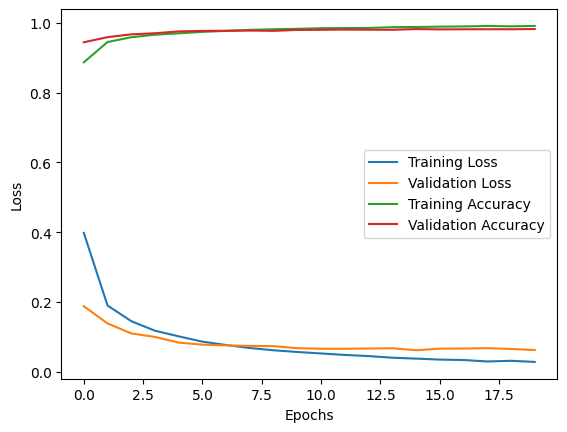

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=20,batch_size=128,
                      validation_data=(X_test,y_test))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0157 - accuracy: 0.9956 - val_loss: 0.0618 - val_accuracy: 0.9828
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 0.0620 - val_accuracy: 0.9825
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0148 - accuracy: 0.9959 - val_loss: 0.0618 - val_accuracy: 0.9827
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0148 - accuracy: 0.9957 - val_loss: 0.0620 - val_accuracy: 0.9831
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0152 - accuracy: 0.9956 - val_loss: 0.0621 - val_accuracy: 0.9828
Epoch 6/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0626 - val_accuracy: 0.9828
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 0.0627 - val_accuracy: 0.9826
Epoch 

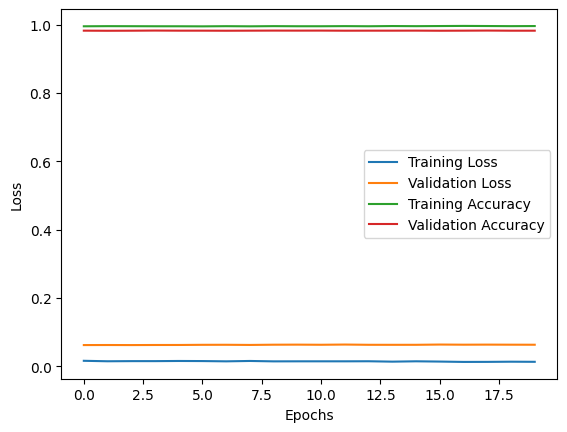

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=20,batch_size=128,
                      validation_data=(X_test,y_test))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()